## Segmenting and Clustering Neighborhoods in Toronto

- Importing Libraries and Packages
- Let's start by importing the appropriate libraries and packages needed for the assignment.

In [19]:
!conda install -c anaconda beautifulsoup4

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    beautifulsoup4-4.8.2       |           py36_0         161 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    beautifulsoup4:  4.7.1-py36_1                          --> 4.8.2-py36_0      anaconda
    certifi:         2020.4.5.1-py36h9f0ad1d_0 conda-forge --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1f-h516909a_0         conda-forge

In [20]:

!conda install -c anaconda lxml

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lxml-4.5.0                 |   py36hefd8a0e_0         1.6 MB  anaconda

The following packages will be UPDATED:

    lxml: 4.3.1-py36hefd8a0e_0 --> 4.5.0-py36hefd8a0e_0 anaconda


lxml-4.5.0           | 1.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [21]:

!conda install -c anaconda requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - requests


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    requests-2.23.0            |           py36_0          91 KB  anaconda

The following packages will be UPDATED:

    requests: 2.21.0-py36_0 --> 2.23.0-py36_0 anaconda


requests-2.23.0      | 91 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Website Scraping and Transforming Data

In [22]:

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv

In [23]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text


In [24]:
soup = BeautifulSoup(source, 'lxml')


In [25]:
table = soup.find_all('table')[0]


In [26]:

# import this HTML table in a DataFrame
dfs = pd.read_html(str(table), header = 0)

In [27]:

# function read_html always returns a list of DataFrame objects
df = dfs[0]

In [28]:

# renaming of columns headers
df.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [29]:
# Remove Boroughs that are not assigned
df = df[df['Borough'] != 'Not assigned']

In [30]:
# copying the Borough name onto Neighborhood only if Neighborhood name is not assigned
df['Neighborhood'] = df['Borough'].where(df['Neighborhood'] == 'Not assigned', df['Neighborhood'])
# or can do this >>> df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned', df['Borough'], df['Neighborhood'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
# join all neighborhoods with the same postalcode and borough
grouped = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(lambda x: ', '.join(x))

# convert a groupby object to dataframe
grouped.reset_index()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [32]:
df_nbh = pd.DataFrame(grouped)
dfnbh = df_nbh.reset_index()
dfnbh.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [33]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [34]:
df_merged = pd.merge(left=dfnbh, right=geo, left_on='PostalCode', right_on='Postal Code', how='left')
df_merged.head()

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,M1B,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,M1C,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


In [35]:
df_merged.drop(['Postal Code'], axis=1, inplace=True)
df_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Visualisation on a Map

In [36]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0        anaconda --> 2020.4.5.1-hecc5488_0     conda-forge
    certifi:         2020.4.5.1-py36_0 anaconda --> 2020.4.5.1-py36h9f0ad1d_0 conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0  anaconda --> 1.1.1f-h516909a_0         conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [37]:
!conda install -c conda-forge geopy --yes


Solving environment: done

# All requested packages already installed.



In [38]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Create a map of Toronto with Boroughs superimposed on top

In [39]:
# removing Boroughs that does not contain the word "Toronto" in it, reduce data size
# creating a new dataframe 
df_toronto = dfnbh[dfnbh['Borough'].str.contains('Toronto')]

In [40]:
df_merged2 = pd.merge(left=df_toronto, right=geo, left_on='PostalCode', right_on='Postal Code', how='left')
df_merged2.head()

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
1,M4K,East Toronto,The Danforth West / Riverdale,M4K,43.679557,-79.352188
2,M4L,East Toronto,India Bazaar / The Beaches West,M4L,43.668999,-79.315572
3,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790


In [41]:

df_merged2.drop(['Postal Code'], axis=1, inplace=True)
df_merged2.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,The Danforth West / Riverdale,43.679557,-79.352188
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [42]:
df_merged2.shape

(39, 5)

In [43]:

# find out the latitude and longitude of Toronto
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [44]:

# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_merged2['Latitude'], df_merged2['Longitude'], df_merged2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Explore Venues around Postal Codes in Toronto


In [45]:
# Foursquare Credentials Definition

In [53]:
CLIENT_ID = 'RZEXI5LZLL5UMVK3RPZWYM1X2M055EKWLDPOWIKVCQEYT2GL' # your Foursquare ID
CLIENT_SECRET = 'TX20QXHP5IGJZCGJ4HMENQ1MN11I0YSHKXIEUOXVUK5DHMAJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RZEXI5LZLL5UMVK3RPZWYM1X2M055EKWLDPOWIKVCQEYT2GL
CLIENT_SECRET:TX20QXHP5IGJZCGJ4HMENQ1MN11I0YSHKXIEUOXVUK5DHMAJ


In [54]:

# function that extracts the category of the venue from Foursqure json response
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [52]:

# function to find out venues around postal codes with categories, lat, lng

# Limit to 100 per postalcode
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue, clean json and structure it into a pandas df
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:

# run above function on each boroughs and create a new df called toronto_venues
toronto_venues = getNearbyVenues(names=df_merged2['PostalCode'],
                                   latitudes=df_merged2['Latitude'],
                                   longitudes=df_merged2['Longitude']
                                  )

M4E
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6G
M6H
M6J
M6K
M6P
M6R
M6S
M7A
M7Y


In [56]:
# check size of resulting df
print(toronto_venues.shape)
toronto_venues.head()

(859, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M4E,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,M4E,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,M4E,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4K,43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [57]:
# check how many venues were returned for each postal code
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
M4E,4,4,4,4,4,4
M4K,30,30,30,30,30,30
M4L,22,22,22,22,22,22
M4M,30,30,30,30,30,30
M4N,3,3,3,3,3,3
M4P,8,8,8,8,8,8
M4R,18,18,18,18,18,18
M4S,30,30,30,30,30,30
M4T,2,2,2,2,2,2


In [58]:

# find out how many unique categories that can be curated from all the returned values
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 188 uniques categories.


## Analysis of Postal Codes


In [59]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

In [60]:
toronto_onehot.drop(['Neighborhood'], axis=1, inplace=True)

In [61]:

# add Postal Code column back to dataframe at position 0 (in front)
toronto_onehot.insert(0, 'Neighborhood', toronto_venues['Neighborhood'])

In [62]:
toronto_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# group rows by neighborhood and take the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Art Gallery,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,M4E,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4K,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
2,M4L,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4M,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333
4,M4N,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M4P,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,M4R,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556
7,M4S,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,M4T,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M4V,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.062500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000


In [64]:

toronto_grouped.shape

(39, 188)

In [65]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4E----
                        venue  freq
0           Health Food Store  0.25
1                       Trail  0.25
2                         Pub  0.25
3                     Airport  0.00
4  Modern European Restaurant  0.00


----M4K----
                venue  freq
0    Greek Restaurant  0.23
1  Italian Restaurant  0.07
2      Ice Cream Shop  0.07
3         Yoga Studio  0.03
4                Café  0.03


----M4L----
                  venue  freq
0  Fast Food Restaurant  0.09
1        Sandwich Place  0.09
2                  Park  0.09
3               Brewery  0.05
4      Sushi Restaurant  0.05


----M4M----
                venue  freq
0                Café  0.13
1         Coffee Shop  0.10
2              Bakery  0.07
3  Seafood Restaurant  0.03
4                 Bar  0.03


----M4N----
                       venue  freq
0                       Park  0.33
1                   Bus Line  0.33
2                Swim School  0.33
3                    Airport  0.00
4  Middle Eastern Restaur

In [66]:
# write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:

# reate the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,Trail,Pub,Health Food Store,Yoga Studio,Cuban Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner
1,M4K,Greek Restaurant,Italian Restaurant,Ice Cream Shop,Coffee Shop,Cosmetics Shop,Pizza Place,Pub,Dessert Shop,Café,Bakery
2,M4L,Park,Sandwich Place,Fast Food Restaurant,Movie Theater,Pizza Place,Italian Restaurant,Burrito Place,Restaurant,Ice Cream Shop,Pub
3,M4M,Café,Coffee Shop,Bakery,Brewery,Bar,Ice Cream Shop,Comfort Food Restaurant,Seafood Restaurant,Sandwich Place,Yoga Studio
4,M4N,Park,Swim School,Bus Line,Dance Studio,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


## Finding the best K Value

In [70]:

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [71]:
# scale the continuous features
mms = MinMaxScaler()
mms.fit(toronto_grouped_clustering)
toronto_grouped_clustering_transformed = mms.transform(toronto_grouped_clustering)

NameError: name 'toronto_grouped_clustering' is not defined

In [72]:

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering_transformed)
    Sum_of_squared_distances.append(km.inertia_)

NameError: name 'toronto_grouped_clustering_transformed' is not defined

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

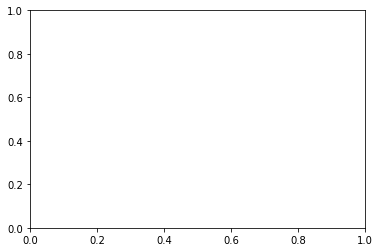

In [73]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Clustering Postal Codes

In [ ]:
# Run k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [ ]:

toronto_merged = df_merged2

In [ ]:
neighborhoods_venues_sorted.set_index('Neighborhood')

In [ ]:

# # merge toronto_grouped with toronto_data(df_merged2) to add latitude/longitude for each neighborhood
toronto_merged = pd.merge(left=toronto_merged, right=neighborhoods_venues_sorted, left_on='PostalCode', right_on='Neighborhood', how='left')
toronto_merged.head()

In [ ]:
# visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, nei, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['PostalCode'], toronto_merged['Neighborhood_x'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' Neighborhood(s): ' + str(nei), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Cluster

In [ ]:
# cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
# cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:

# cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
# cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [ ]:
# cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]